<a href="https://colab.research.google.com/github/ilunsenody-source/enody/blob/main/Prediction_Diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des bibliotheque

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



# 2.Changement des donnes

In [42]:
df=pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [43]:
df.shape

(768, 9)

In [44]:
df.isna
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Creation d'un histogramme pour visualisation les variable

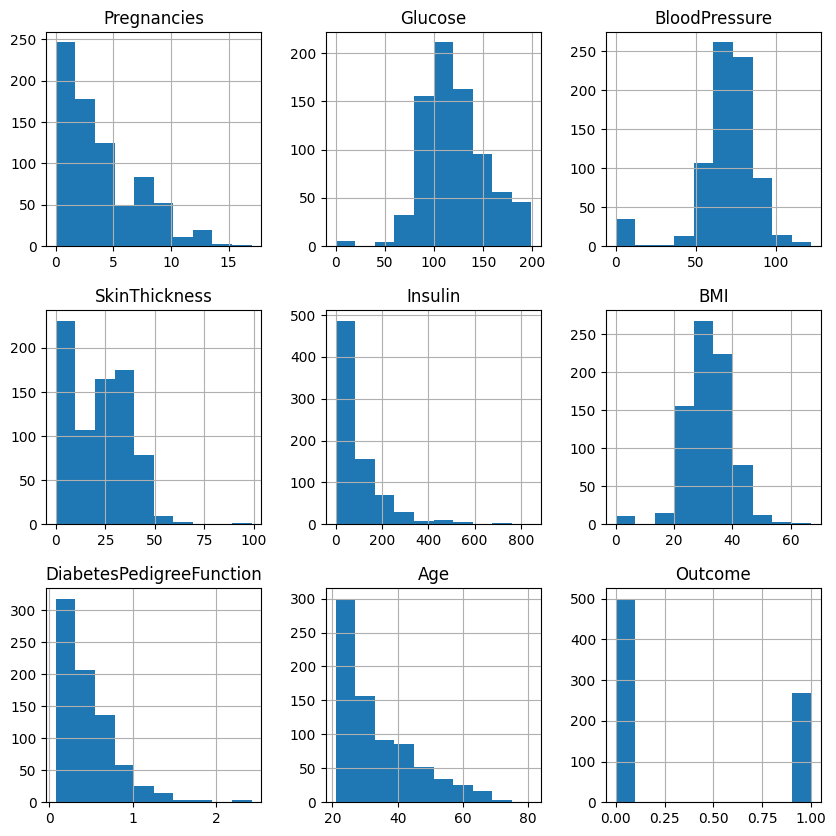

In [46]:
df.hist(figsize=(10,10))
plt.show()

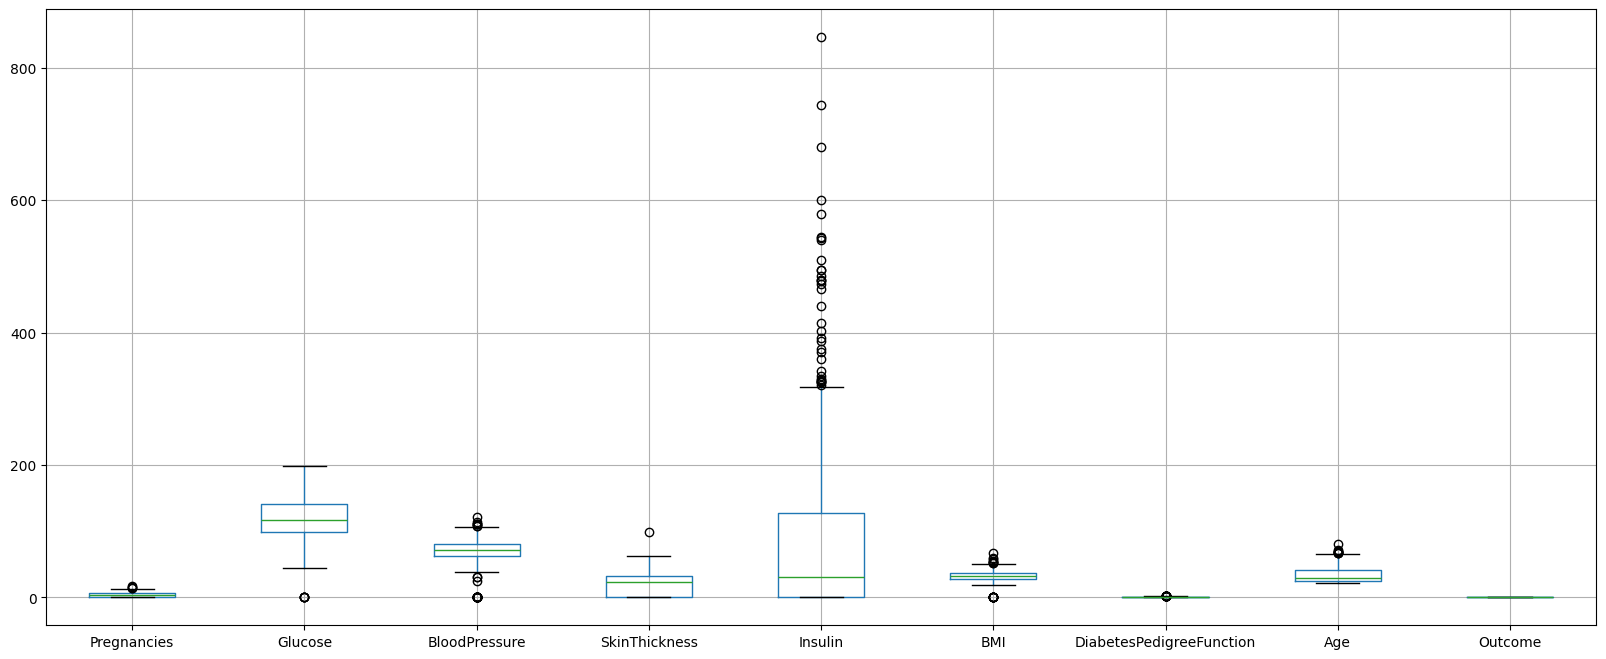

In [47]:
df.boxplot(figsize=(20,8))
plt.show()

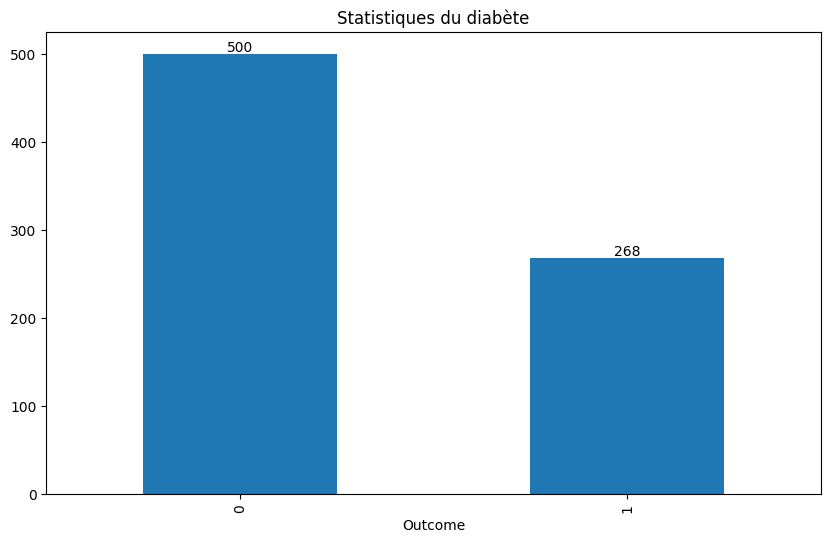

In [48]:
bar=df['Outcome'].value_counts().plot(kind='bar',figsize=(10,6))
bar=plt.bar_label(bar.containers[0],fontsize=10)
plt.title('Statistiques du diabète')
plt.show()

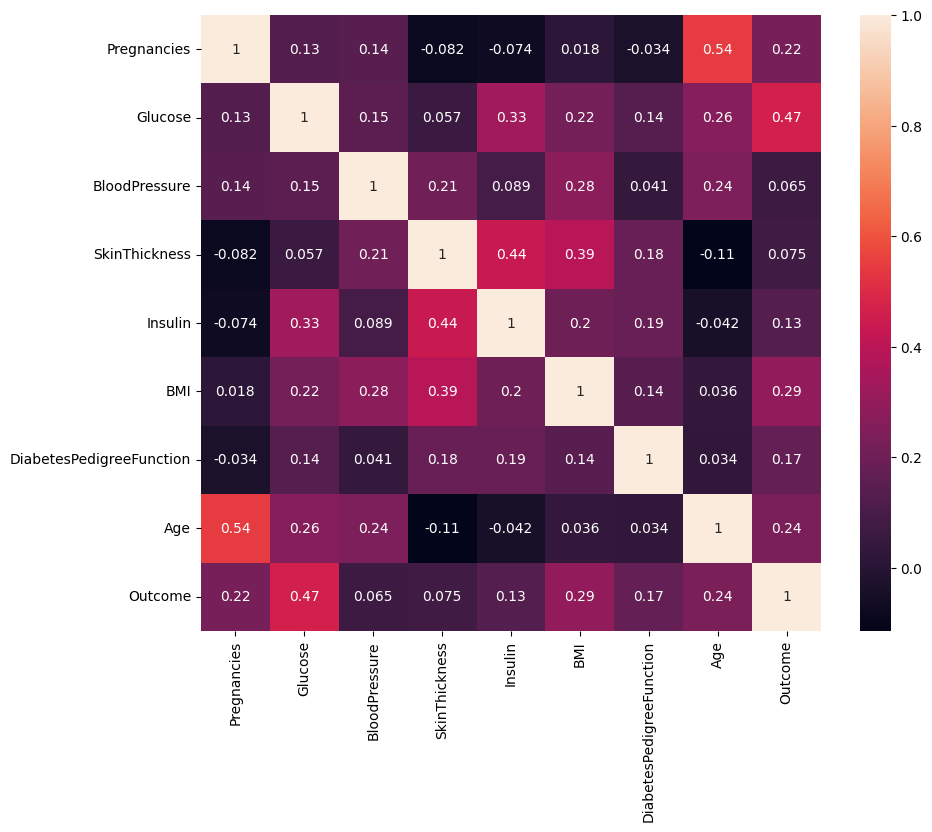

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Creation du modele de regression logistique

# 3.1 Decouper le dataset en train et test

In [50]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'], test_size=0.3,random_state=16)

# 3.2 Creation du modele de regression logistique

In [51]:
modele_log=LogisticRegression(max_iter=1000)
modele_log.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
y_pred_train=modele_log.predict(x_train)
y_pred_test=modele_log.predict(x_test)

In [53]:
accuray=metrics.accuracy_score(y_train,y_pred_train)
precision=metrics.precision_score(y_train,y_pred_train)
f1_score=metrics.f1_score(y_train,y_pred_train)

In [54]:
print('accuracy :',accuray)
print('precision :',precision)
print('f1_score :',f1_score)

accuracy : 0.770949720670391
precision : 0.7194244604316546
f1_score : 0.6191950464396285


# Creation de la nouvelle patiente

In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
prediction=modele_log.predict([[18,148,72,25,0,33.6,0.00,23]])
print(prediction)

[1]


In [57]:
prediction=modele_log.predict([[18,148,72,25,0,33.6,0.00,23]])
if prediction==1:
    print('le patient est diabétique')
else:
    print('le patient n est pas diabétique')

le patient est diabétique


# Creation de la matrice de confusion

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=metrics.confusion_matrix(y_train,y_pred_train)

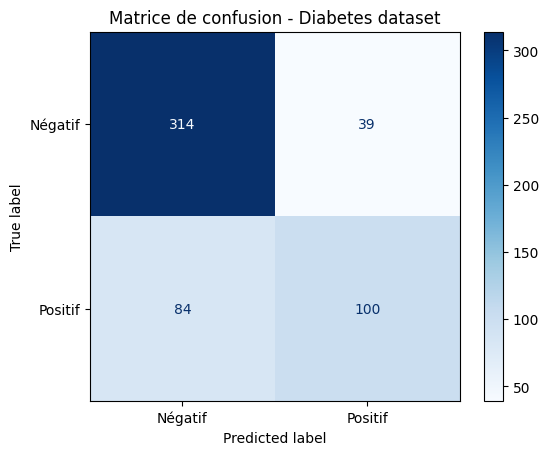

In [85]:
#ConfusionMatrixDisplay est une classe de scikit-learn qui sert à visualiser une matrice de confusion.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Négatif", "Positif"])
#La méthode .plot() dessine la matrice de confusion sous forme de grille colorée.
disp.plot(cmap=plt.cm.Blues)
#Ajoute un titre au graphique pour préciser ce qu’on regarde.Ici, tu indiques que la matrice correspond au dataset du diabète
plt.title("Matrice de confusion - Diabetes dataset")
#Affiche réellement le graphique dans Colab.
plt.show()